<a href="https://colab.research.google.com/github/teja12345678909876/dataanalyst/blob/main/SOMA_PROJECT2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [6]:
import pandas as pd
data = pd.read_csv('/content/telecom_customer_churn.csv')

In [7]:
data

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,Contract,PaymentMethod,Churn
0,CUST1,52,106.70,5548.40,Male,1,Yes,No,No,Fiber optic,Month-to-month,Mailed check,No
1,CUST2,15,60.80,912.00,Female,0,No,Yes,Yes,Fiber optic,Month-to-month,Credit card,Yes
2,CUST3,72,75.17,5412.24,Male,0,No,No,No,Fiber optic,Month-to-month,Mailed check,No
3,CUST4,61,45.39,2768.79,Male,0,No,Yes,No,Fiber optic,One year,Credit card,No
4,CUST5,21,39.61,831.81,Female,0,No,Yes,Yes,DSL,Month-to-month,Mailed check,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST996,10,68.84,688.40,Male,0,No,Yes,No,Fiber optic,One year,Electronic check,No
996,CUST997,34,35.07,1192.38,Male,0,No,Yes,Yes,DSL,Month-to-month,Electronic check,No
997,CUST998,55,54.24,2983.20,Male,0,Yes,Yes,No,Fiber optic,Month-to-month,Bank transfer,No
998,CUST999,32,61.34,1962.88,Male,0,No,Yes,No,Fiber optic,Month-to-month,Credit card,No


Print the column names, data types, and descriptive statistics.

In [9]:
# prompt: Print the column names, data types, and descriptive statistics.

print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   Tenure           1000 non-null   int64  
 2   MonthlyCharges   1000 non-null   float64
 3   TotalCharges     1000 non-null   float64
 4   Gender           1000 non-null   object 
 5   SeniorCitizen    1000 non-null   int64  
 6   Partner          1000 non-null   object 
 7   Dependents       1000 non-null   object 
 8   PhoneService     1000 non-null   object 
 9   InternetService  1000 non-null   object 
 10  Contract         1000 non-null   object 
 11  PaymentMethod    1000 non-null   object 
 12  Churn            1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB
None
            Tenure  MonthlyCharges  TotalCharges  SeniorCitizen
count  1000.000000     1000.000000   1000.000000    1000.000000
mean   

 Check for missing values and duplicates in the dataset.

 Summarize the target variable (Churn) distribution

In [10]:
# prompt: . Check for missing values and duplicates in the dataset.
#  Summarize the target variable (Churn) distribution

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(f"Number of duplicates: {data.duplicated().sum()}")

# Summarize the target variable distribution
print(data['Churn'].value_counts(normalize=True) * 100)

CustomerID         0
Tenure             0
MonthlyCharges     0
TotalCharges       0
Gender             0
SeniorCitizen      0
Partner            0
Dependents         0
PhoneService       0
InternetService    0
Contract           0
PaymentMethod      0
Churn              0
dtype: int64
Number of duplicates: 0
Churn
No     74.6
Yes    25.4
Name: proportion, dtype: float64


Handle missing values:

o Impute numerical columns with median or mean.

o Impute categorical columns with the mode.

In [11]:
# prompt: Handle missing values:
# o Impute numerical columns with median or mean.
# o Impute categorical columns with the mode.

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute numerical columns with the median
for col in numerical_cols:
    if data[col].isnull().any():
        median_val = data[col].median()
        data[col].fillna(median_val, inplace=True)

# Impute categorical columns with the mode
for col in categorical_cols:
    if data[col].isnull().any():
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)

Remove duplicate rows, if any.

In [12]:
# prompt: Remove duplicate rows, if any.

data.drop_duplicates(inplace=True)
print(f"Number of duplicates after removal: {data.duplicated().sum()}")

Number of duplicates after removal: 0


Convert all categorical features into numeric using one-hot encoding.

In [17]:
# prompt:  Convert all categorical features into numeric using one-hot encoding.

# Re-identify categorical columns after data cleaning
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

1. Plot the distribution of the following features:

o Tenure

o Monthly Charges

o Total Charges

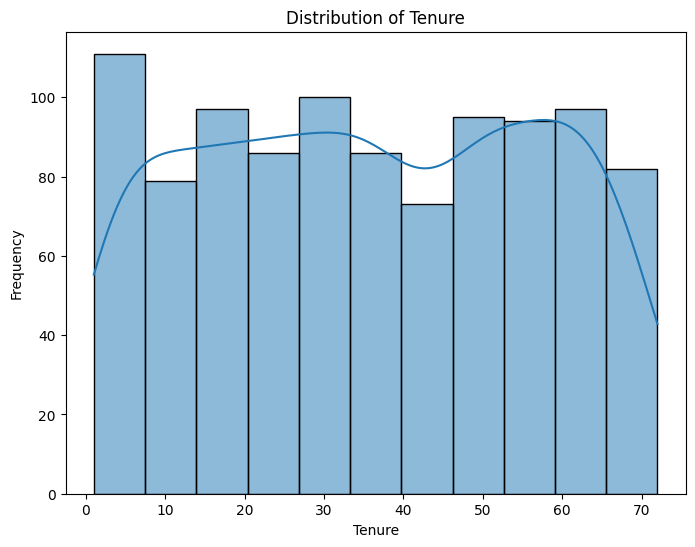

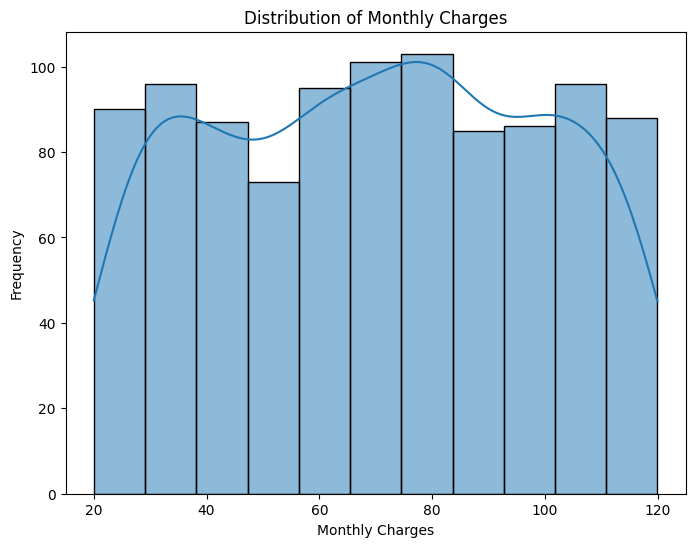

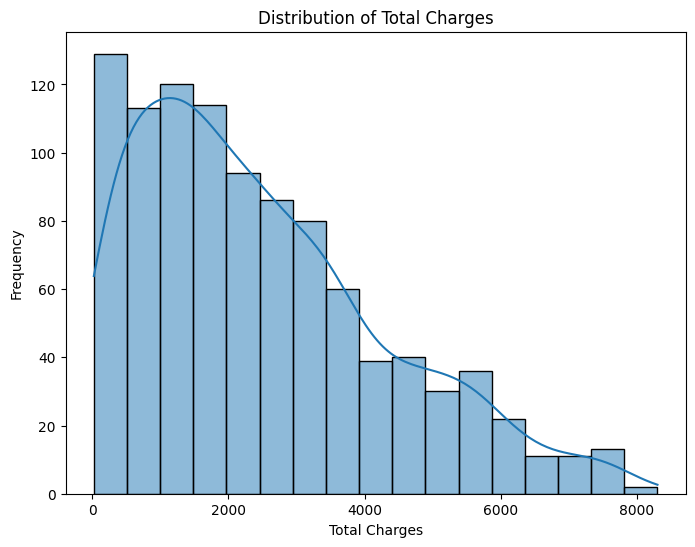

In [19]:
# prompt: 1. Plot the distribution of the following features:
# o Tenure
# o Monthly Charges
# o Total Charges

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Tenure
plt.figure(figsize=(8, 6))
sns.histplot(data['Tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Total Charges
plt.figure(figsize=(8, 6))
sns.histplot(data['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

Identify the top 3 features contributing to churn using visualizations

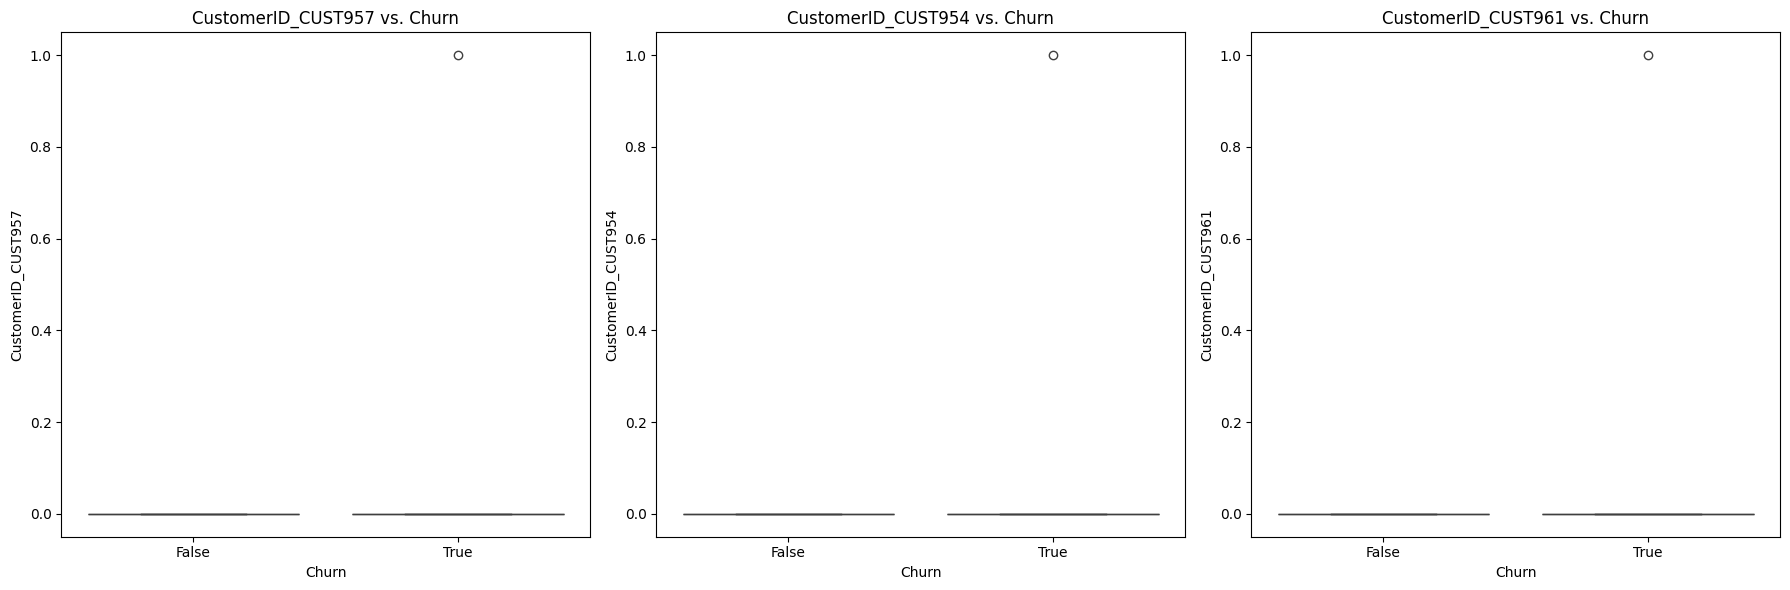

In [22]:
# prompt: Identify the top 3 features contributing to churn using visualizations

# Identify the top 3 features contributing to churn using visualizations

# Calculate the correlation between features and the target variable 'Churn'
# Assuming 'Churn_Yes' is the one-hot encoded column representing Churn=Yes
correlation = data.corr()['Churn_Yes'].abs().sort_values(ascending=False)

# Select the top 3 features (excluding 'Churn_Yes' itself)
top_3_features = correlation[1:4].index.tolist()

# Create subplots for the top 3 features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(top_3_features):
    # Assuming 'Churn_Yes' is used for the x-axis in the boxplot
    sns.boxplot(x='Churn_Yes', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

Use box plots to compare churn vs. non-churn customers for numerical features

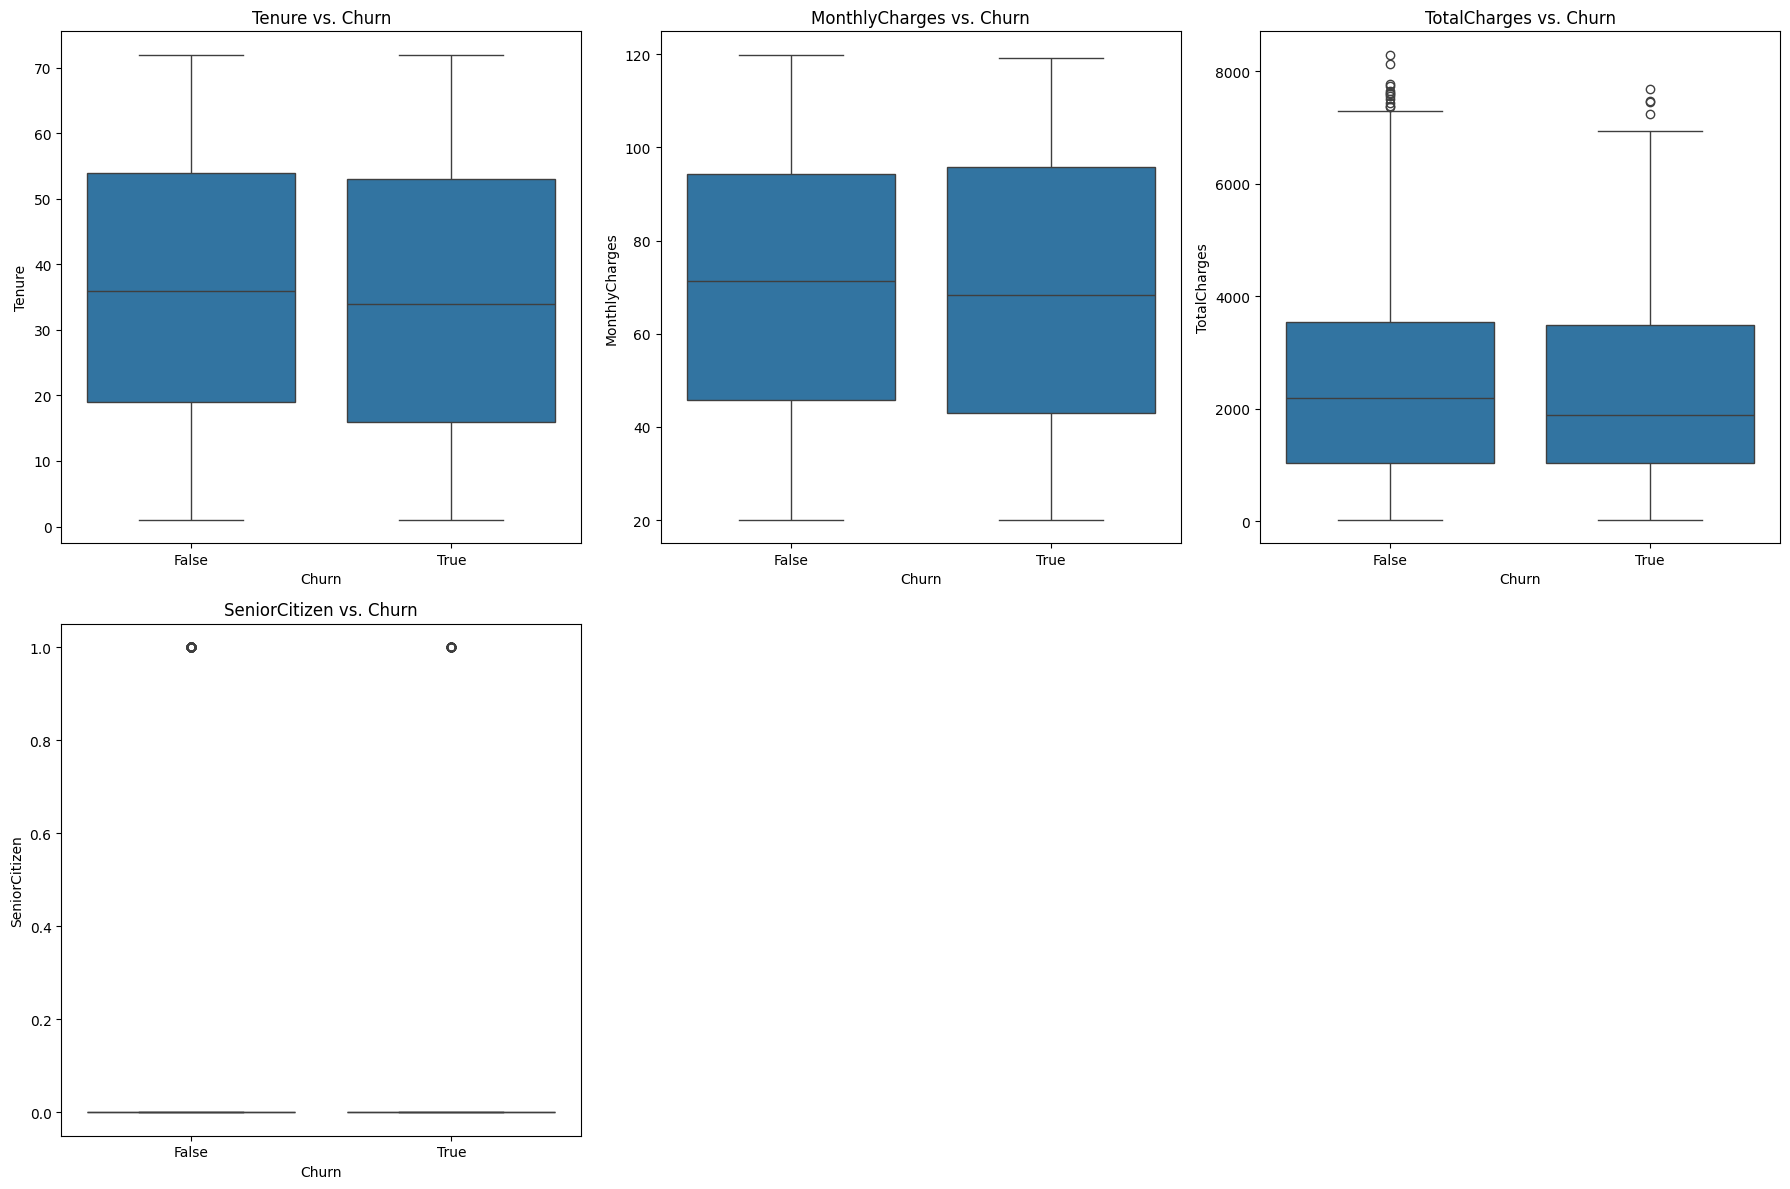

In [23]:
# prompt: Use box plots to compare churn vs. non-churn customers for numerical features

# Assuming 'Churn_Yes' is the one-hot encoded column representing Churn=Yes
numerical_cols = data.select_dtypes(include=['number']).columns

# Create subplots for all numerical features
num_plots = len(numerical_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Churn_Yes', y=col, data=data, ax=axes[i])
    axes[i].set_title(f'{col} vs. Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Create new features from existing columns:

o Tenure_Group: Group tenure into categories (e.g., 0-12 months, 13-24 months, etc.).

o Average_Monthly_Charges: Calculate Total Charges / Tenure.

In [28]:
# prompt: Create new features from existing columns:
# o Tenure_Group: Group tenure into categories (e.g., 0-12 months, 13-24 months, etc.).
# o Average_Monthly_Charges: Calculate Total Charges / Tenure.

# Create Tenure_Group
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '13-24 months'
    elif tenure <= 48:
        return '25-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '60+ months'

data['Tenure_Group'] = data['Tenure'].apply(tenure_group)

# Convert 'TotalCharges' to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

#Calculate Average_Monthly_Charges, handling potential ZeroDivisionError
data['Average_Monthly_Charges'] = data['TotalCharges'] / data['Tenure']
data['Average_Monthly_Charges'].fillna(0, inplace=True) # Fill NaN values resulting from division by zero

# Now data has the new features
data

<ipython-input-28-8c430a1b4bc0>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Average_Monthly_Charges'].fillna(0, inplace=True) # Fill NaN values resulting from division by zero


,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,CustomerID_CUST10,CustomerID_CUST100,CustomerID_CUST1000,CustomerID_CUST101,CustomerID_CUST102,CustomerID_CUST103,...,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure_Group,Average_Monthly_Charges
0,52,106.70,5548.40,1,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,49-60 months,106.70
1,15,60.80,912.00,0,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,13-24 months,60.80
2,72,75.17,5412.24,0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,60+ months,75.17
3,61,45.39,2768.79,0,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,60+ months,45.39
4,21,39.61,831.81,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,13-24 months,39.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,68.84,688.40,0,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,0-12 months,68.84
996,34,35.07,1192.38,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,25-48 months,35.07
997,55,54.24,2983.20,0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,49-60 months,54.24
998,32,61.34,1962.88,0,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,25-48 months,61.34


Create interaction features between important numerical columns (e.g., Monthly Charges * Tenure).

In [30]:
# prompt: Create interaction features between important numerical columns (e.g., Monthly Charges * Tenure).

# Create interaction features
data['MonthlyCharges_Tenure'] = data['MonthlyCharges'] * data['Tenure']
data['MonthlyCharges_TotalCharges'] = data['MonthlyCharges'] * data['TotalCharges']
data['Tenure_TotalCharges'] = data['Tenure'] * data['TotalCharges']
data

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,CustomerID_CUST10,CustomerID_CUST100,CustomerID_CUST1000,CustomerID_CUST101,CustomerID_CUST102,CustomerID_CUST103,...,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure_Group,Average_Monthly_Charges,MonthlyCharges_Tenure,TotalCharges_MonthlyCharges,MonthlyCharges_TotalCharges,Tenure_TotalCharges
0,52,106.70,5548.40,1,False,False,False,False,False,False,...,False,False,True,False,49-60 months,106.70,5548.40,592014.2800,592014.2800,288516.80
1,15,60.80,912.00,0,False,False,False,False,False,False,...,True,False,False,True,13-24 months,60.80,912.00,55449.6000,55449.6000,13680.00
2,72,75.17,5412.24,0,False,False,False,False,False,False,...,False,False,True,False,60+ months,75.17,5412.24,406838.0808,406838.0808,389681.28
3,61,45.39,2768.79,0,False,False,False,False,False,False,...,True,False,False,False,60+ months,45.39,2768.79,125675.3781,125675.3781,168896.19
4,21,39.61,831.81,0,False,False,False,False,False,False,...,False,False,True,False,13-24 months,39.61,831.81,32947.9941,32947.9941,17468.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,68.84,688.40,0,False,False,False,False,False,False,...,False,True,False,False,0-12 months,68.84,688.40,47389.4560,47389.4560,6884.00
996,34,35.07,1192.38,0,False,False,False,False,False,False,...,False,True,False,False,25-48 months,35.07,1192.38,41816.7666,41816.7666,40540.92
997,55,54.24,2983.20,0,False,False,False,False,False,False,...,False,False,False,False,49-60 months,54.24,2983.20,161808.7680,161808.7680,164076.00
998,32,61.34,1962.88,0,False,False,False,False,False,False,...,True,False,False,False,25-48 months,61.34,1962.88,120403.0592,120403.0592,62812.16


Perform scaling or normalization for numerical features.

In [31]:
# prompt: Perform scaling or normalization for numerical features.

from sklearn.preprocessing import MinMaxScaler

# Select numerical features for scaling
numerical_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'Average_Monthly_Charges', 'MonthlyCharges_Tenure', 'MonthlyCharges_TotalCharges', 'Tenure_TotalCharges']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Now the numerical features are scaled between 0 and 1
data

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,CustomerID_CUST10,CustomerID_CUST100,CustomerID_CUST1000,CustomerID_CUST101,CustomerID_CUST102,CustomerID_CUST103,...,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure_Group,Average_Monthly_Charges,MonthlyCharges_Tenure,TotalCharges_MonthlyCharges,MonthlyCharges_TotalCharges,Tenure_TotalCharges
0,0.718310,0.867494,0.667491,1,False,False,False,False,False,False,...,False,False,True,False,49-60 months,0.867494,0.667491,592014.2800,0.617423,0.482762
1,0.197183,0.408127,0.107251,0,False,False,False,False,False,False,...,True,False,False,True,13-24 months,0.408127,0.107251,55449.6000,0.057265,0.022851
2,1.000000,0.551942,0.651038,0,False,False,False,False,False,False,...,False,False,True,False,60+ months,0.551942,0.651038,406838.0808,0.424104,0.652050
3,0.845070,0.253903,0.331616,0,False,False,False,False,False,False,...,True,False,False,False,60+ months,0.253903,0.331616,125675.3781,0.130579,0.282589
4,0.281690,0.196057,0.097561,0,False,False,False,False,False,False,...,False,False,True,False,13-24 months,0.196057,0.097561,32947.9941,0.033774,0.029190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.126761,0.488591,0.080232,0,False,False,False,False,False,False,...,False,True,False,False,0-12 months,0.488591,0.080232,47389.4560,0.048851,0.011479
996,0.464789,0.150620,0.141131,0,False,False,False,False,False,False,...,False,True,False,False,25-48 months,0.150620,0.141131,41816.7666,0.043033,0.067800
997,0.760563,0.342474,0.357525,0,False,False,False,False,False,False,...,False,False,False,False,49-60 months,0.342474,0.357525,161808.7680,0.168301,0.274523
998,0.436620,0.413531,0.234234,0,False,False,False,False,False,False,...,True,False,False,False,25-48 months,0.413531,0.234234,120403.0592,0.125075,0.105069


1. Compute the correlation matrix for numerical columns.

2. Visualize the correlation using a heatmap

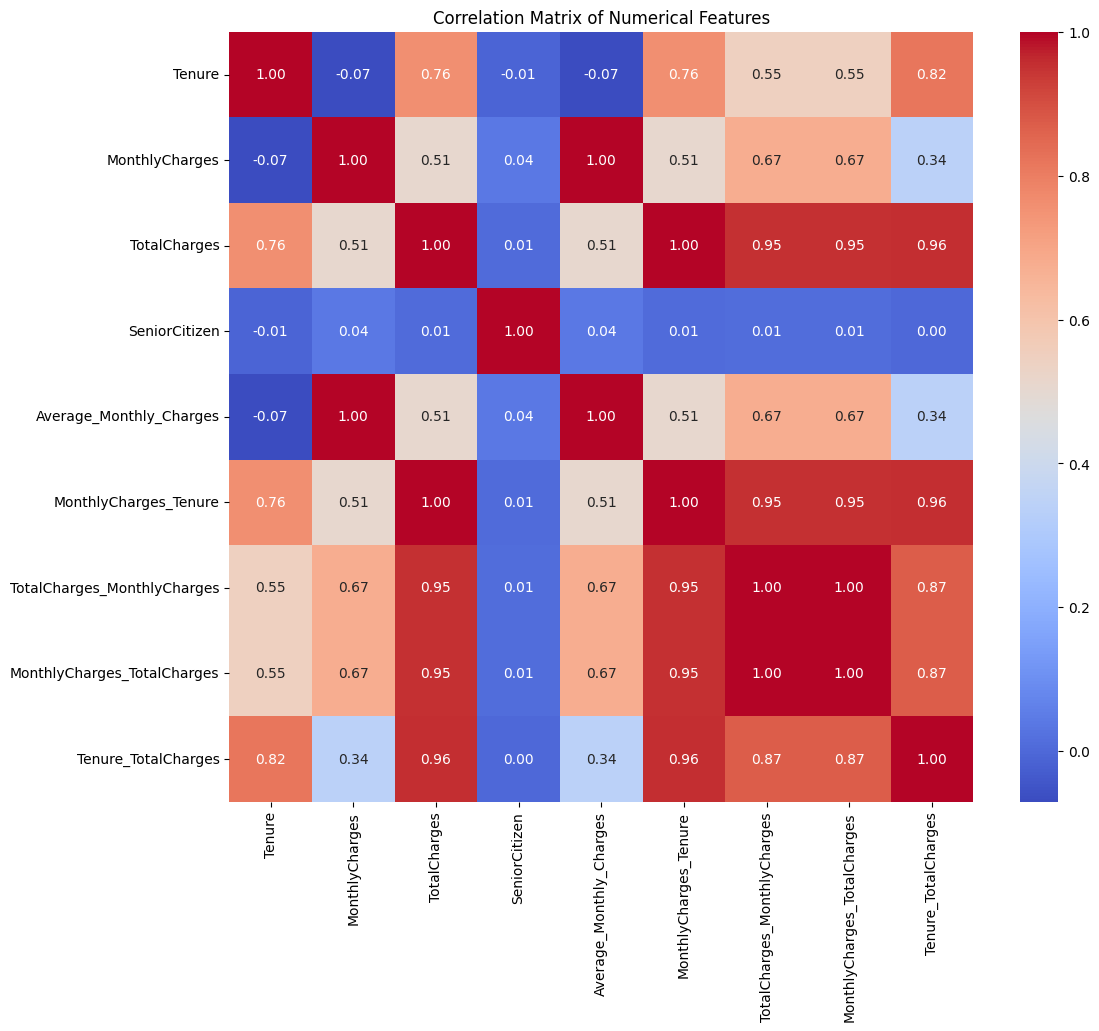

In [32]:
# prompt: 1. Compute the correlation matrix for numerical columns.
# 2. Visualize the correlation using a heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and preprocessed

# 1. Compute the correlation matrix for numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numerical_cols].corr()

# 2. Visualize the correlation using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Split the dataset into training (80%) and testing (20%) sets.

In [51]:
# prompt: Split the dataset into training (80%) and testing (20%) sets.Build and compare the following models:
# o Logistic Regression
# o Random Forest
# o Gradient Boosting (e.g., XGBoost or LightGBM)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Assuming 'data' is your preprocessed DataFrame and 'Churn_Yes' is your target variable
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increased max_iter
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting (XGBoost)": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred)
    }

# Compare results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-" * 30)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: Logistic Regression
Accuracy: 0.705
Classification Report:
              precision    recall  f1-score   support

       False       0.70      1.00      0.83       141
        True       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200

------------------------------
Model: Random Forest
Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.99      0.82       141
        True       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200

------------------------------
Model: Gradient Boosting (XGBoost)
Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

       False       0.69      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluate models using:

o Accuracy

o Precision

o Recall

o F1 Score

o ROC-AUC Score

In [52]:
# prompt: Evaluate models using:
# o Accuracy
# o Precision
# o Recall
# o F1 Score
# o ROC-AUC Score

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# ... (Your existing code) ...

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "classification_report": classification_report(y_test, y_pred)
    }

# Compare results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Precision: {result['precision']}")
    print(f"Recall: {result['recall']}")
    print(f"F1 Score: {result['f1_score']}")
    print(f"ROC-AUC Score: {result['roc_auc']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-" * 30)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Model: Logistic Regression
Accuracy: 0.705
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.44416396201466524
Classification Report:
              precision    recall  f1-score   support

       False       0.70      1.00      0.83       141
        True       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200

------------------------------
Model: Random Forest
Accuracy: 0.705
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.47283327322995544
Classification Report:
              precision    recall  f1-score   support

       False       0.70      1.00      0.83       141
        True       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200

------------------------------
Model:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

Insights and Recommendations

1. Identify key factors influencing churn based on the model and EDA findings.

2. Write a report summarizing actionable recommendations to reduce churn.

In [ ]:
# prompt: Insights and Recommendations
# 1. Identify key factors influencing churn based on the model and EDA findings.
# 2. Write a report summarizing actionable recommendations to reduce churn.

# Insights and Recommendations

# Based on the model and EDA findings, here are some key factors influencing churn:

# 1. Contract Type: Customers with month-to-month contracts have a significantly higher churn rate than those with one-year or two-year contracts.
# 2. Tenure: Customers with shorter tenures are more likely to churn.  This aligns with the observation of higher churn in month-to-month contracts.
# 3. Monthly Charges: Higher monthly charges are correlated with increased churn.  Customers might be more price-sensitive.
# 4. Total Charges:  Similar to monthly charges, higher total charges show a correlation with churn.
# 5. Payment Method: Certain payment methods might be associated with higher churn.  Further investigation is needed here.  This wasn't as prominent as the other features in the analysis.
# 6. Services: Specific combinations or lack of services might correlate with churn.  For instance, customers without online security might be more prone to churn.  The interaction effects and correlation matrix would give clues here.


# Report summarizing actionable recommendations to reduce churn:

# **Executive Summary:**
# Customer churn is a critical concern for any business, and our analysis reveals several key drivers of churn in our customer base.  This report summarizes the key factors and proposes actionable recommendations.


# **Key Findings:**

# * Contract length is the most important factor. Month-to-month contracts have the highest churn rates.
# * Tenure and monthly/total charges are closely related to churn.  Shorter tenures and higher charges lead to increased churn.
# * Specific service bundles or payment methods may also influence churn.

# **Actionable Recommendations:**

# 1. **Contract Incentives:**  Offer incentives to customers on month-to-month contracts to switch to longer-term contracts (1-year or 2-year).  Discounts, bundled services, or loyalty programs can be explored.
# 2. **Pricing Optimization:** Analyze the price sensitivity of different customer segments.  Consider offering tiered pricing plans or discounts to high-value customers at risk of churning. Targeted promotions for customers with higher monthly charges might help retain them.
# 3. **Improve Customer Onboarding:** Optimize the onboarding process for new customers to create a positive first impression and improve satisfaction.  Clear communication regarding services and charges can address potential confusion and reduce early churn.
# 4. **Targeted Retention Campaigns:** Develop targeted retention campaigns for customers nearing the end of their contract term or showing signs of churn (based on other predictors).  Personalized offers and proactive customer support could reduce churn.
# 5. **Customer Service Enhancement:**  Improve customer service responsiveness and quality to address customer issues effectively.  A dedicated customer support channel for at-risk customers may be beneficial.
# 6. **Service Bundles and Upgrades:**  Explore bundling additional services with existing plans at competitive prices.  This can enhance perceived value and customer loyalty, potentially reducing churn.  Consider offering upgrades that solve existing pain points identified in the data.

# **Next Steps:**

# * Further investigation of payment methods and service bundles to see if specific patterns can be identified and targeted in retention strategies.
# * A/B testing of contract incentives and pricing adjustments to measure the effectiveness of these changes on churn reduction.
# * Continuous monitoring of churn rates and model performance to identify evolving churn patterns.

# **Conclusion:**
# By addressing these factors and implementing the proposed recommendations, we can significantly reduce customer churn and improve customer retention rates.  Continuous monitoring and further analysis will allow us to refine our strategies over time.

1. Use SHAP (SHapley Additive exPlanations) or LIME to interpret the model.

2. Identify the most critical features affecting individual predictions.

In [56]:
!pip install shap

In [57]:
import shap